# Evolutionary Computing - N-Queens Problem


**Goal**: Implement an Evolutionary Algorithm to solve for the N-Queens problem. Could be defined as minimization of maximization.

This assignment requires implementation of the main components of an evolutionary algorithm (i.e. *crossover*, *mutation*, *parent selection*, etc), and construction of your algorithm to solve the given problem. Try to make your EA as good performing as possible (solving also the bigger chess boards).

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

  * Plagiarism is automatically checked and set to **0 points**

  * It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

POINTS ARE ONLY FOR RELATIVE FEEDBACK, NOT AN ACTUAL GRADE.

**Setup**

**Install Prerequisites**

In [31]:
import sys
from pathlib import Path

# Add your user's site-packages directory to the Python path
user_site_packages = Path.home() / '.local' / 'lib' / f'python{sys.version_info.major}.{sys.version_info.minor}' / 'site-packages'
sys.path.append(str(user_site_packages))

# Now try your imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums

print("Success! All imports working.")

Success! All imports working.


**Plotting**

In [30]:
# Enables inline matplotib graphs
# %matplotlib inline
%pip install PyQt5
# Comment the line above and uncomment the lines below to have interactive plots
# WARN: may cause dependency issues
#%matplotlib qt5
#%pip install PyQt5
#plt.ion()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


---

## Discrete Optimization - The N-Queens Problem (5 points total)

Implement an Evolutionary Algorithm for the **n-queens problem** - finding a placement of N queens on an N by N chess board, in which no queens are attacking each other.

Below is a visualization of a solution for the n-queens problem when n = 4. Observe that none of the queens are attacking each other.

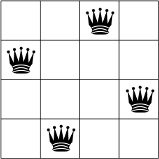


We would like to implement an EA that can find a solution for any given N by N board, by placing N queens where none of them attack each other.
It is usually better to start simple and generalize your implementation. So, let's start with the case when **N = 4**.

### **Question 1 (0-0.3 pt):**
* How do you represent a solution (a 4 queen placement on a 4x4 chess board)? In particular, specify the length of your genotype representation, what each gene (dimension) represents, and what values they can get.

**Answer:** I would represent a solution as an array $v$ of size $N$ such that $v_i$ represents the column dimension of the queen present on row $i$. The length of my genotype representation is $N$. Note that $\forall i, j \in N, i \ne j \iff v_i \ne v_j$

### **Question 2 (0-0.2 pt):**
* Please write down an example representation and discuss what it means.

**Answer:** $[2,0,3,1]$ represents the solution in the diagram above.


### **Question 3 (0-0.2 pt):** 
* How many possible solutions can be generated in your representation?

**Answer:** The number of possible solutions this representation can generate is $N!$ (disregarding various symmetries about the chess board which would be considered equivalent and bring this number down).

---

### **Task 1 (0-0.20-0.40-0.80):** 
Implementation of solution encoding, visualization and evaluation functions.

In [3]:
################################################################


# PLEASE FILL IN - how do you represent your solution?
example_solution = [2,0,3,1]


################################################################

Write a function below that can visualize your solution. For instance, the output may look like below, a matrix representing the 4x4 chess board where each Q indicates a queen placement and dots are empty cells. <br>
<br>
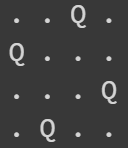


In [4]:
def visualize_solution(solution):
    """Visualize the placement of queens on the chessboard."""

    ################################################################
    
    N = len(solution)
    big_string = ""
    for i in range(N):
        string = ""
        for j in range(N):
            if solution[i] == j:
                string += "Q "
            else:
                string += ". "
        string += "\n"
        big_string += string
    print(big_string)
            

    ################################################################

visualize_solution(example_solution)

. . Q . 
Q . . . 
. . . Q 
. Q . . 



Write the evaluation function to assess how good your solution is.

In [ ]:
def evaluate_solution_n_queens(solution):
    """Calculate the fitness of a solution."""
    ################################################################
    # PLEASE FILL IN
    N = len(solution)
    max_pairs = N * (N - 1) // 2 

    main_diags = [0] * (2 * N - 1)
    anti_diags = [0] * (2 * N - 1)

    for row in range(N):
        col = solution[row]
        anti_diags[row + col] += 1
        main_diags[col - row + (N - 1)] += 1

    def pairs(arr):
        total = 0
        for c in arr:
            if c > 1:
                total += c * (c - 1) // 2
        return total
    diagonal_conflicts = pairs(main_diags) + pairs(anti_diags)
    fitness = max_pairs - diagonal_conflicts
    ################################################################

    return fitness


Try your implementations to see if your solution encoding matches to visualization and whether the fitness is computed correctly.

In [106]:
#################################
# Grading
# 0 pts: No attempt, representation discussed does not match with the implementation and visualization, fitness is not correct.
# 0.20 : Solution representation matches with visualization, fitness computation is not correct, no explanation in the code.
# 0.50 : Solution representation matches with visualization, fitness computation is correct, no explanation in the code.
# 0.80 : Solution representation matches with visualization, fitness computation is correct, the implementation explained well.
################################################################


###################### DO NOT CHANGE #########################
print("Genotype (solution representation):", example_solution)
print("Phenotype (solution visualization):")
visualize_solution(example_solution)
print("Solution fitness", evaluate_solution_n_queens(example_solution))
###################### DO NOT CHANGE #########################

Genotype (solution representation): [2, 0, 3, 1]
Phenotype (solution visualization):
. . Q . 
Q . . . 
. . . Q 
. Q . . 

Solution fitness 6


---



### **Task 2 (0-0.4-0.8-1.2-1.6 pt):** 
Write an evolutionary algorithm that can initialize a population of solutions and finds N queen placement to NxN board optimizing the number of attacks (could be minimization or maximization based on your evaluation function of the solutions).

In [ ]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.4 pts if the code works but some functions are incorrect and it is badly explained
# 0.8 pts if the code works but some functions are incorrect but it is explained well
# 1.2 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 1.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################
import random

def initialization_n_queens(population_size, num_of_dims):
    """Generate a population of solutions."""
    ################################################################

    # PLEASE FILL IN

    x = []
    sample_list = []
    for i in range(num_of_dims):
        sample_list.append(i)
        
    for i in range(population_size):
        solution = sample_list.copy()
        random.shuffle(solution)
        x.append(solution)


    ################################################################

    return x


def evaluation_n_queens(x):
    """Evaluate the whole population and return the fitness of each."""
    return [evaluate_solution_n_queens(solution) for solution in x]

def return_min_max(x, y):
    if x <= y:
        return (x, y)
    else:
        return (y, x)

def crossover(p1, p2):
    """Perform crossover to create one offspring."""
    N = len(p1)

    cross_point = random.randint(0, N-1)

    offspring = []

    # Copy the segment from Parent 1 to the offspring
    for i in range(cross_point):
        offspring.append(p1[i])

    # Legalization: Fill the rest from Parent 2
    for i in range(cross_point, N):
        if not p2[i] in offspring:
            offspring.append(p2[i])

    for i in range(cross_point):
        if not p2[i] in offspring:
            offspring.append(p2[i])

    return offspring


def crossover_n_queens(x_parents, p_crossover):
    population_size = len(x_parents)
    offspring=[]
    random.shuffle(x_parents)
    
    # Iterate over pairs of parents as per the shuffle
    for i in range(0, population_size-1, 2):
        p1 = x_parents[i]
        p2 = x_parents[i+1]

        # Cross the parents and appent the offspring to the list
        if random.random() <= p_crossover:
            offspring.append(crossover(p1, p2))
            offspring.append(crossover(p2, p1))

        # Add the parents on their own to maintain population size
        else:
            offspring.append(p1)
            offspring.append(p2)
    
    # Address unpaired parent if the population is odd (which it won't be).
    if population_size % 2 == 1:
        offspring.append(x_parents[-1])


    return offspring

def mutation_n_queens(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################

    # YOUR CODE HERE
    for solution in x:
        if random.random() > mutation_rate:
            continue

        N = len(solution)
        # Choose two points at random
        point_1 = random.randint(0, N-1)
        point_2 = random.randint(0, N-1)

        # Ensure they are different
        while point_1 == point_2:
            point_1 = random.randint(0, N-1)
            point_2 = random.randint(0, N-1)

        # Perform the swap
        solution[point_1], solution[point_2] = solution[point_2], solution[point_1]


    ################################################################

    return x


def selection_n_queens(x, k, N):
    """Select N solutions using tournament selection (tournaments of size k). Functions as both parent and survivor selection."""

    ################################################################

    # YOUR CODE HERE
    f = evaluation_n_queens(x)
    x_parents = []

    while len(x_parents) < N:
        initial_population_size = len(x)

        # Sample individuals from the population for the tournament
        samples = random.sample(range(initial_population_size), k)

        best_sample_fitness = 0

        # Find the sample with the greatest fitness
        for sample_index in samples:
            fitness = f[sample_index]
            if fitness > best_sample_fitness:
                best_sample_index = sample_index
                best_sample_fitness = fitness

        # Add the solution to the list
        x_parents.append(x[best_sample_index])

        # Loop until the population has sufficiently many individuals.


    ####################################
    return x_parents


# def survivor_selection_n_queens(x_parents, x_offspring, k, N):
#     """Select the survivors using Generational Replacement with tournament selection."""
#     ################################################################
#     # YOUR CODE HERE

#     x = x_parents + x_offspring

#     f = evaluation_n_queens

#     x_new = []

#     while len(x_new) < N:


#     # Find the best parent from the previous generation
#     best_parent_index = np.argmax(f_parents)
#     best_parent = x_parents[best_parent_index]
#     best_parent_fitness = f_parents[best_parent_index]

#     # Find the worst offspring in the new generation
#     worst_offspring_index = np.argmin(f_new)

#     # Replace the worst offspring with the best parent
#     x_new[worst_offspring_index] = best_parent
#     f_new[worst_offspring_index] = best_parent_fitness

#     x = x_new
#     f = f_new

#     ################################################################
#     return x, f


def ea_n_queens(population_size, max_fit_evals, p_crossover, m_rate, num_of_dims):
    # Calculate the maximum number of generations
    max_generations = int(max_fit_evals / population_size)

    # Initialize population and calculate fitness
    x = initialization_n_queens(population_size, num_of_dims)
    f = evaluation_n_queens(x)

    # Get best individual and append to list
    idx = np.argmax(f)
    x0_best = x[idx]
    f0_best = f[idx]
    x_best = [x0_best]
    f_best = [f0_best]

    # Loop over the generations
    for gen in range(max_generations - 1):
        # Select population size parents
        x_parents = selection_n_queens(x, 5, len(x))
        
        x_offspring = crossover_n_queens(x_parents, p_crossover)
        x_offspring = mutation_n_queens(x_offspring, m_rate)
        # x, f = survivor_selection_n_queens(
        #     x_parents, x_offspring
        # )

        x = selection_n_queens(x_parents +  x_offspring, 3, population_size)
        f = evaluation_n_queens(x)

        # Find the best individual in current generation and add to the list
        idx = np.argmax(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best > f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])

        x_best.append(xi_best)
        f_best.append(fi_best)


    return x_best, f_best

---
**Results:**

Run the code below to run an EA for N=8, 16 and 32, and visualize the best solutions found.
Note, it is not allowed to change the hyper parameters


In [233]:
print("Case when N=8:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 8)


print("Best fitness:", f_best[-1])
print("Best solution found:")
print(x_best[-1])
visualize_solution(x_best[-1])

Case when N=8:
Best fitness: 28
Best solution found:
[3, 1, 6, 2, 5, 7, 4, 0]
. . . Q . . . . 
. Q . . . . . . 
. . . . . . Q . 
. . Q . . . . . 
. . . . . Q . . 
. . . . . . . Q 
. . . . Q . . . 
Q . . . . . . . 



In [234]:
print("Case when N=16:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 16)


print("Best fitness:", f_best[-1])
print("Best solution found:")
print(x_best[-1])
visualize_solution(x_best[-1])

Case when N=16:
Best fitness: 119
Best solution found:
[6, 2, 15, 8, 14, 7, 9, 1, 12, 5, 0, 10, 4, 13, 11, 3]
. . . . . . Q . . . . . . . . . 
. . Q . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . Q 
. . . . . . . . Q . . . . . . . 
. . . . . . . . . . . . . . Q . 
. . . . . . . Q . . . . . . . . 
. . . . . . . . . Q . . . . . . 
. Q . . . . . . . . . . . . . . 
. . . . . . . . . . . . Q . . . 
. . . . . Q . . . . . . . . . . 
Q . . . . . . . . . . . . . . . 
. . . . . . . . . . Q . . . . . 
. . . . Q . . . . . . . . . . . 
. . . . . . . . . . . . . Q . . 
. . . . . . . . . . . Q . . . . 
. . . Q . . . . . . . . . . . . 



In [235]:
print("Case when N=32:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 32)

print("Best fitness:", f_best[-1])
print("Best solution found:")
print(x_best[-1])
visualize_solution(x_best[-1])

Case when N=32:
Best fitness: 495
Best solution found:
[21, 30, 10, 15, 1, 24, 20, 6, 28, 7, 5, 27, 12, 19, 8, 18, 25, 22, 9, 11, 29, 14, 3, 0, 31, 26, 2, 23, 17, 13, 4, 16]
. . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . 
. . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . 
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . 
. . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . 
. . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . 
. . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . 
. . . . . . . . . . . . Q . . . . . . . . . . 

---

### Plotting the average performance of the algorithm
Use the cells below to plot the results of your algorithm. The plots should show average and std of 10 runs of EA for n-queens problem for N=8, 16, 32.

In [236]:
def calculate_mean_std(f_best):
    """This is a helper function to calculate the mean and standard deviation of the best fitness values."""
    f_best = np.array(f_best)
    avg = np.mean(f_best, axis=0)
    std = np.std(f_best, axis=0)
    return avg, std

In [237]:
def run_experiment_n_queens(population_size, p_crossover, m_rate):

    # These are the hyperparameters of your evolutionary algorithm. You are not allowed to change them.
    runs = 10
    max_fit_evals = 10000


    fitness_8 = []
    fitness_16 = []
    fitness_32 = []



    for run in range(runs):
        print("Run: ", run)

        _, f_best_8 = ea_n_queens(
            population_size[0], max_fit_evals, p_crossover[0], m_rate[0], num_of_dims=8
        )
        _, f_best_16 = ea_n_queens(
            population_size[1], max_fit_evals, p_crossover[1], m_rate[1], num_of_dims=16
        )
        _, f_best_32 = ea_n_queens(
            population_size[2], max_fit_evals, p_crossover[2], m_rate[2], num_of_dims=32
        )
        fitness_8.append(f_best_8)
        fitness_16.append(f_best_16)
        fitness_32.append(f_best_32)

    avg_8, std_8 = calculate_mean_std(fitness_8)
    avg_16, std_16 = calculate_mean_std(fitness_16)
    avg_32, std_32 = calculate_mean_std(fitness_32)

    avgs = [avg_8, avg_16, avg_32]
    stds = [std_8, std_16, std_32]
    all_runs = [fitness_8, fitness_16, fitness_32]

    return avgs, stds, all_runs

In [238]:
population_size = [100, 100, 100]  # not allowed to change
p_crossover = [0.8, 0.8, 0.8]  # not allowed to change
m_rate = [0.1, 0.1, 0.1]  # not allowed to change

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment_n_queens(
    population_size, p_crossover, m_rate
)

Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Run:  5
Run:  6
Run:  7
Run:  8
Run:  9


In [239]:
#check for the best fitness found for each problem

f_8, f_16, f_32 = all_runs_experiment_1

print("Best fitness found for N = 8: ", max(max(f_8)))
print("Best fitness found for N = 16: ", max(max(f_16)))
print("Best fitness found for N = 32: ", max(max(f_32)))

Best fitness found for N = 8:  28
Best fitness found for N = 16:  120
Best fitness found for N = 32:  493


In [240]:
def generate_subplot_function( # EDITED USING AN LLM SINCE THE FUNCTION THAT WAS PROVIDED BY THE NOTEBOOK GAVE BLANK PLOTS.
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=3,
    n_queens=None,
):
    """This helper function generates subplots for the experiments."""
    fig, axes = plt.subplots(nrows=1, ncols=n_columns, figsize=(18, 6))
    
    # Ensure axes is always iterable even when n_columns=1
    if n_columns == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        # Plot Experiment 1 data
        ax.plot(avgs_experiment_1[i], label="Experiment 1", color="blue")
        ax.fill_between(
            np.arange(len(avgs_experiment_1[i])),
            avgs_experiment_1[i] - stds_experiment_1[i],
            avgs_experiment_1[i] + stds_experiment_1[i],
            alpha=0.2,
            color="blue",
        )
        
        # Plot Experiment 2 data if provided
        if avgs_experiment_2 is not None and stds_experiment_2 is not None:
            ax.plot(avgs_experiment_2[i], label="Experiment 2", color="green")
            ax.fill_between(
                np.arange(len(avgs_experiment_2[i])),
                avgs_experiment_2[i] - stds_experiment_2[i],
                avgs_experiment_2[i] + stds_experiment_2[i],
                alpha=0.2,
                color="green",
            )
        
        # Set y-axis limits
        ax.set_ylim(bottom=0)
        if n_queens is not None:
            # For N-Queens, the maximum possible fitness is n_queens*(n_queens-1)/2
            max_possible_fitness = n_queens[i] * (n_queens[i] - 1) / 2
            ax.set_ylim(top=max_possible_fitness)
        
        ax.set_title(labels[i])
        ax.set_xlabel("Generations")
        ax.set_ylabel("Average Best Fitness")
        ax.legend()

    plt.tight_layout()
    return fig

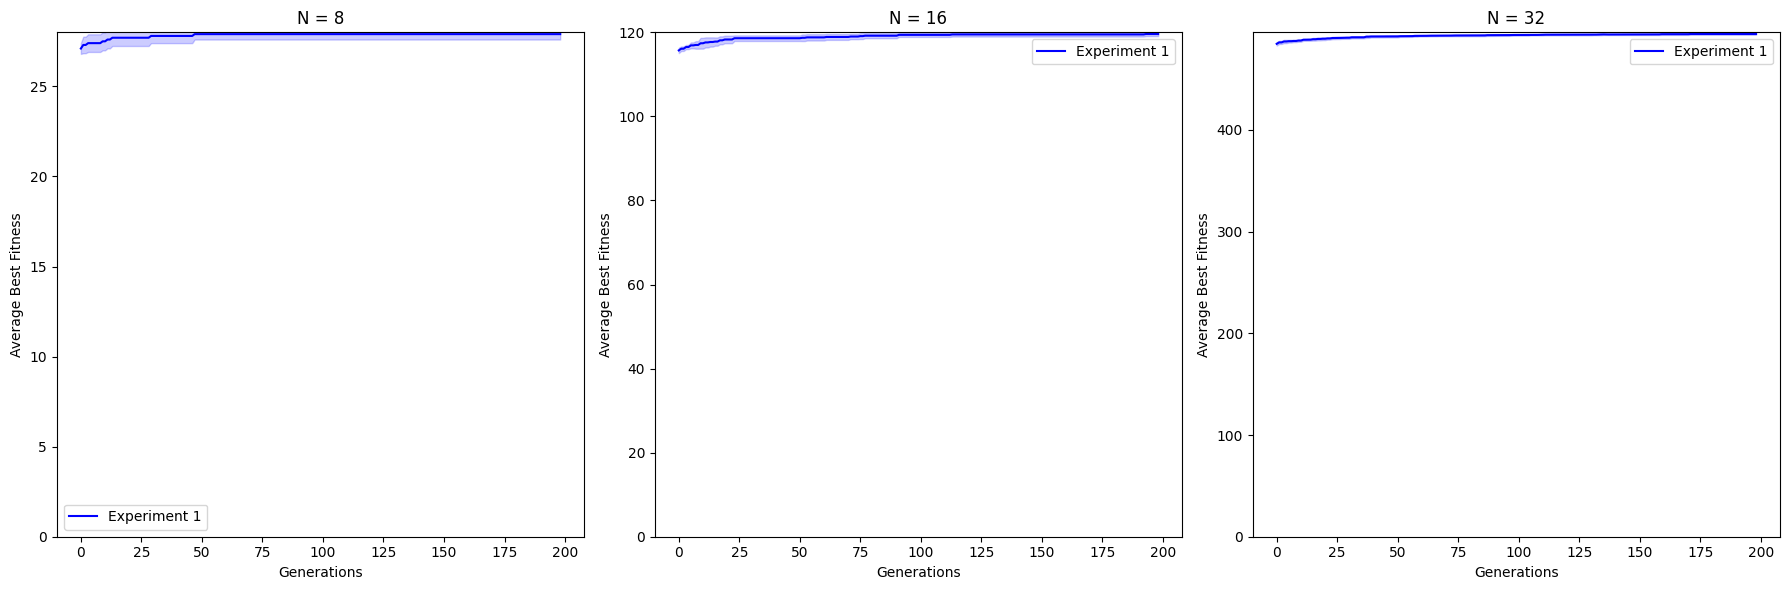

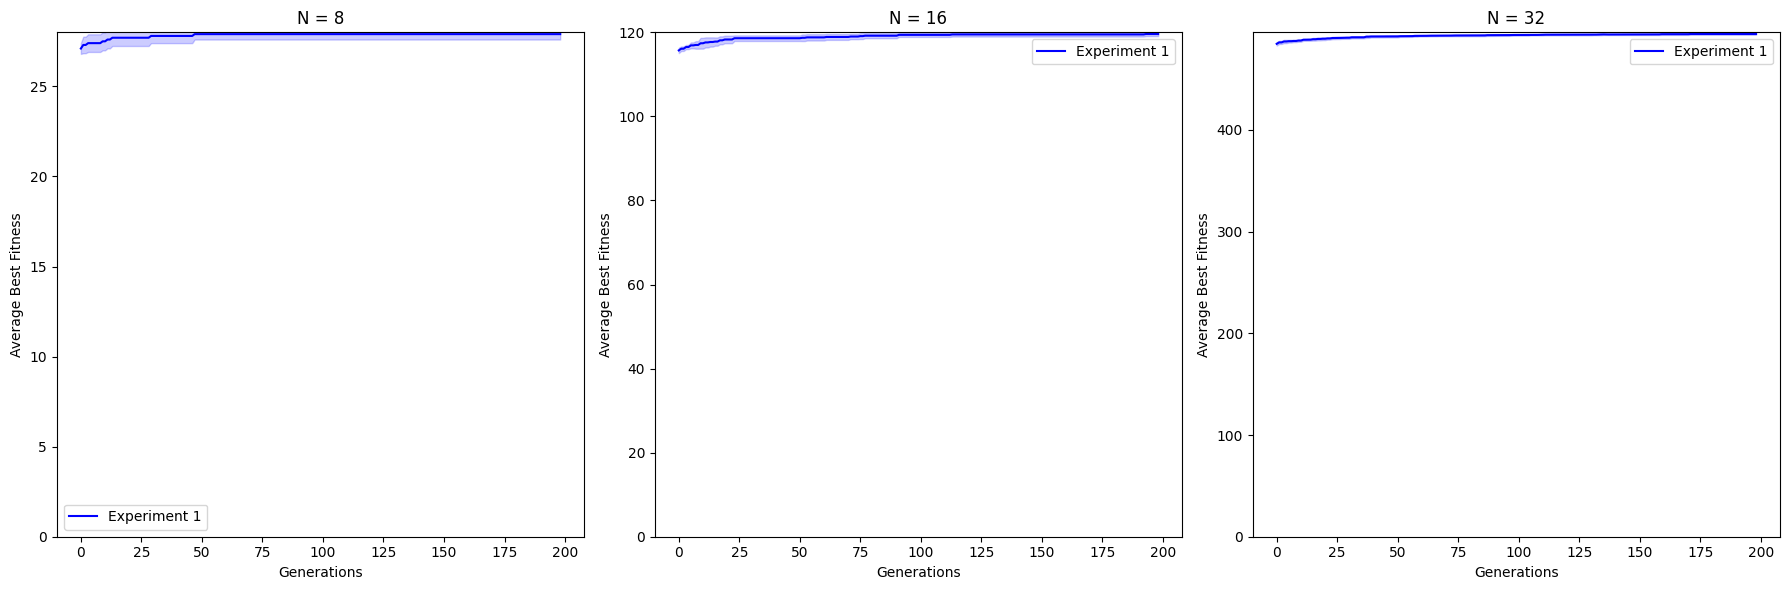

In [241]:
labels = ["N = 8", "N = 16", "N = 32"]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=3,
    n_queens=[8, 16, 32],
)

### **Question 4 (0-0.4 pt):** 
* Describe the average performance of the algorithm. What was the maximum average fitness found for each case? Do you see any differences between the problem cases?

**Answer**: The algorithm performs near optimally on average. After running some tests, I found that a randomly initialized population will have an individual that is quite near to the maximum of the fitness function. As such, it is sensible to promote more diversity to explore more options. This can be done by decreasing tournament size for example. In all cases, the maximum average fitness is around the maximum average. I will compute it more precisely below. As for the differences between plots, I can see that the lower the board dimension, the more visible the standard deviation, though that is most likely a problem of scale. It is also clear that the lower the dimension of the problem, the less time it takes to converge to a proper solution. In this case, no ideal solution was found to the 32x32 board. 



In [248]:
for i in range(len(avgs_experiment_1)):
    N = 2**(i+3)
    print(f"{N}x{N} Maximum Average Fitness: {np.mean(avgs_experiment_1[i])}")

8x8 Maximum Average Fitness: 27.8427135678392
16x16 Maximum Average Fitness: 119.01557788944724
32x32 Maximum Average Fitness: 492.67537688442206
